<a href="https://colab.research.google.com/github/RajidiSahithi/SahithiR_ERA_Session7/blob/main/Model_3_S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Target:**
1. Adding learning rate schedulers for better results.
2. To achive the desired accuracy consistantly in atlest last 2 epochs

# **Result:**


1.   Parameters: 7,496
2.  Best Training Accuracy: 99.26%
3. Best Test Accuracy: 99.35%



# **Analysis:**

1. To reduce overfitting (flatten the test accuracy graph) Schedular is used.
2. Here I used ReduceLrONplatue schedular.

torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False)

optimizer (Optimizer) – Wrapped optimizer.

mode (str) – in max mode it will be reduced when the quantity monitored has stopped increasing. Default: ‘min’.

factor (float) – Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.0001.

patience (int) – Number of epochs with no improvement after which learning rate will be reduced. For example, if patience = 3, then we will ignore the first 3 epochs with no improvement, and will only decrease the LR after the 4th epoch if the loss still hasn’t improved then. Default: 10.

threshold (float) – Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.

threshold_mode (str) – One of rel, abs. In rel mode, dynamic_threshold = best * ( 1 + threshold ) in ‘max’ mode or best * ( 1 - threshold ) in min mode.

cooldown (int) – Number of epochs to wait before resuming normal operation after lr has been reduced. Default: 0.

min_lr (float or list) – A scalar or a list of scalars. A lower bound on the learning rate of all param groups or each group respectively. Default: 0.

eps (float) – Minimal decay applied to lr. If the difference between new and old lr is smaller than eps, the update is ignored. Default: 1e-8.

verbose (bool) – If True, prints a message to stdout for each update. Default:





In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

Python code snippet

Imports PyTorch’s neural network module
torch.nn and other PyTorch modules such as torch.optim, torch.nn.functional, and torchvision.datasets.


*   The torch.nn module provides classes for defining and training neural networks. It includes layers such as linear layers, convolutional layers, and recurrent layers that can be used to define the architecture of a neural network.
*   The torch.optim module provides optimization algorithms such as stochastic gradient descent (SGD) that can be used to train the neural network.


*   The torch.nn.functional module provides functions that can be used to define the loss function of the neural network.
*   The torchvision.datasets module provides datasets such as MNIST that can be used for training and testing the neural network.

In [ ]:
simple_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                      #  transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))

100%|██████████| 9912422/9912422 [00:00<00:00, 92020139.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 108350352.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26262313.58it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22545004.46it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.Resize((28, 28)),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-5.0, 5.0), fill=(0,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.Resize((28, 28)),
                                      transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)
len(train),len(test)

100%|██████████| 9912422/9912422 [00:00<00:00, 122229376.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39690594.31it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42939578.15it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 25299507.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



(60000, 10000)

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)
#(number of workers=no of CPU)-1
# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


torch.Size([128, 1, 28, 28])
torch.Size([128])


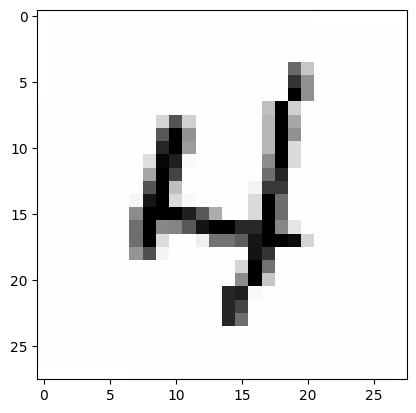

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

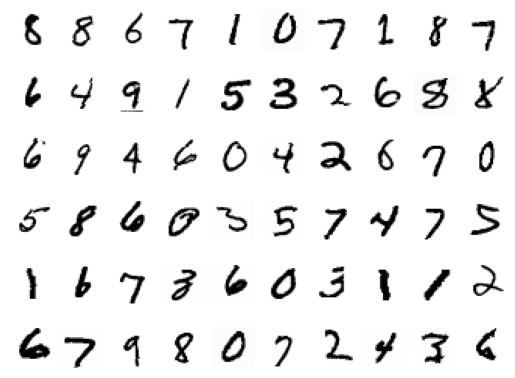

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    drop=0.01
    #INPUT BLOCK
    self.conv1= self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Dropout(drop)
        )
    #CONVOLUTIONAL BLOCK 1
    self.conv2=nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(drop)
        )
    self.maxpool1=nn.MaxPool2d(2,2)
    #TRANSITION BLOCK 1
    self.conv3=nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(8),
            #nn.ReLU()
        )
    # CONVOLUTION BLOCK 2
    self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=12, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Dropout(drop),
            nn.Conv2d(in_channels=12, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(drop),
            nn.Conv2d(in_channels=16, out_channels=20, kernel_size=(3, 3), padding=0, bias=False),
            nn.BatchNorm2d(20),
            nn.ReLU(),
            nn.Dropout(drop)
        )

    # GAP - Adaptive Global Average Pooling
    self.gap = nn.AdaptiveAvgPool2d(1)

    self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=16, kernel_size=(1, 1), padding=0, bias=False), # output_size = 1    RF: 28
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Dropout(drop),
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),  # output  RF: 28
        )

  def forward(self, x):
      x = self.conv1(x)
      x = self.conv2(x)
      x = self.maxpool1(x)
      x = self.conv3(x)
      x = self.conv4(x)
      x = self.gap(x)
      x = self.conv5(x)
      x = x.view(-1, 10)
      return F.log_softmax(x,dim=-1)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
      BatchNorm2d-11            [-1, 8, 12, 12]              16
           Conv2d-12           [-1, 12, 10, 10]             864

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))
    #traing acc<test acc is overfitting and viceversa is underfitting
    #diff b/w traing and test acc increases ---------- it causes overfitting

In [ ]:
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
#scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=EPOCHS, steps_per_epoch=len(train_loader))
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=3, threshold=0.0001,threshold_mode='rel',cooldown=0,min_lr=0,eps=1e-08)
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.06375227868556976 Batch_id=468 Accuracy=92.47: 100%|██████████| 469/469 [00:51<00:00,  9.17it/s]



Test set: Average loss: 0.0643, Accuracy: 9829/10000 (98.29%)

EPOCH: 1


Loss=0.07436634600162506 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:41<00:00, 11.30it/s]



Test set: Average loss: 0.0450, Accuracy: 9878/10000 (98.78%)

EPOCH: 2


Loss=0.015480450354516506 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:40<00:00, 11.59it/s]



Test set: Average loss: 0.0391, Accuracy: 9887/10000 (98.87%)

EPOCH: 3


Loss=0.07734762132167816 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:39<00:00, 11.96it/s]



Test set: Average loss: 0.0352, Accuracy: 9886/10000 (98.86%)

EPOCH: 4


Loss=0.00999689381569624 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:40<00:00, 11.53it/s]



Test set: Average loss: 0.0297, Accuracy: 9900/10000 (99.00%)

EPOCH: 5


Loss=0.04220868647098541 Batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:39<00:00, 11.88it/s]



Test set: Average loss: 0.0300, Accuracy: 9901/10000 (99.01%)

EPOCH: 6


Loss=0.08135063946247101 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:39<00:00, 11.85it/s]



Test set: Average loss: 0.0245, Accuracy: 9920/10000 (99.20%)

EPOCH: 7


Loss=0.06244395300745964 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:39<00:00, 11.86it/s]



Test set: Average loss: 0.0259, Accuracy: 9926/10000 (99.26%)

EPOCH: 8


Loss=0.058317746967077255 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:39<00:00, 11.84it/s]



Test set: Average loss: 0.0273, Accuracy: 9914/10000 (99.14%)

EPOCH: 9


Loss=0.03006535768508911 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:40<00:00, 11.53it/s]



Test set: Average loss: 0.0265, Accuracy: 9916/10000 (99.16%)

EPOCH: 10


Loss=0.02789703756570816 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:38<00:00, 12.07it/s]



Test set: Average loss: 0.0263, Accuracy: 9917/10000 (99.17%)

EPOCH: 11


Loss=0.015156089328229427 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:39<00:00, 11.86it/s]



Test set: Average loss: 0.0234, Accuracy: 9922/10000 (99.22%)

EPOCH: 12


Loss=0.007785123307257891 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:41<00:00, 11.41it/s]



Test set: Average loss: 0.0217, Accuracy: 9933/10000 (99.33%)

EPOCH: 13


Loss=0.030843177810311317 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:39<00:00, 11.99it/s]



Test set: Average loss: 0.0223, Accuracy: 9935/10000 (99.35%)

EPOCH: 14


Loss=0.0020351868588477373 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:39<00:00, 12.01it/s]



Test set: Average loss: 0.0224, Accuracy: 9933/10000 (99.33%)



In [ ]:
train_losses

[tensor(2.4309, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.3492, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.2702, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.2609, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.1776, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.1429, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.0969, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.0725, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.0827, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.0742, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(2.0112, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.9941, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.9718, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.9611, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.9162, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(1.8568, device='cuda:0', grad_fn=<NllLossBackward0>),
 tensor(

In [ ]:
t = [t_items.item() for t_items in train_losses]

Text(0.5, 1.0, 'Test Accuracy')

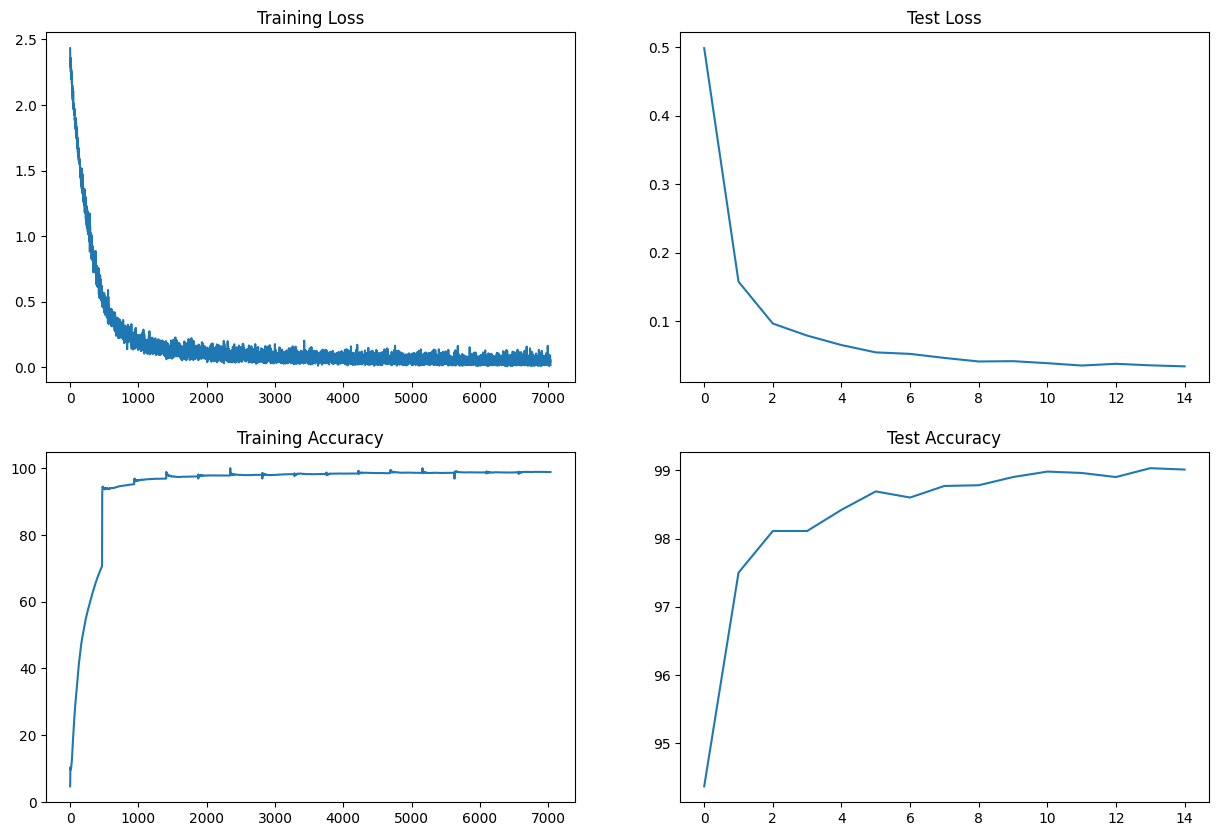

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")